# 数据预处理与特征工程

# 1.缺失值

## 1.1构建一个含缺失值的表

In [ ]:
import numpy as np

In [ ]:
test_data01 = pd.DataFrame([[np.nan,100,99,np.nan],[1,2,3,4],[1,np.nan,50,99],[2,0,np.nan,np.nan]]
                           ,columns=['c1','c2','c3','c4']) 
test_data01

## 1.2查看数据里面的缺失值

In [ ]:
test_data01.head()

In [ ]:
test_data01.info()

In [ ]:
test_data01.isnull()

## 1.3处理方式：删除

In [ ]:
x1 = test_data01.dropna()
x1.head()

In [ ]:
x2 = test_data01.dropna(thresh = 3)  
#thresh参数：比如将其设置为n，那么其含义是如果该行的非空值少于n个则删除该行
#这一行除去null值，剩余数据量大于等于3
x2.head()

In [ ]:
x3 = test_data01.dropna(how = "all")  #how = "all"：删除全部为空值的行
x3.head()

## 1.4处理方式：填充

In [ ]:
#数据缺失比例不是特别高，建议别删除

y1 = test_data01.fillna(0)  #填充为0
y1.head()

In [ ]:
y2 = test_data01.fillna(test_data01.mean())  #填充为每列的平均数
y2.head()

In [ ]:
y3 = test_data01.fillna(test_data01.median())  #填充为每列的中位数
y3.head()

In [ ]:
# method='pad'代表用缺失值所在列的前一个值填充，如果前一个值不存在或也缺失，则结果不变。
y4 = test_data01.fillna(method='pad')
y4

# 2.重复值

## 2.1构建一个含重复值的数据集

In [152]:
test_data02 = pd.DataFrame([[1,2,3,4],[1,2,3,4],[2,4,6,8],[99,98,97,96]]   
                           ,columns=['c1','c2','c3','c4']) #第一行和第二行是重复的
print(test_data02)  

   c1  c2  c3  c4
0   1   2   3   4
1   1   2   3   4
2   2   4   6   8
3  99  98  97  96


## 2.2查看数据里面的重复值

In [153]:
test_data02[test_data02.duplicated()]

,c1,c2,c3,c4
1,1,2,3,4


In [154]:
test_data02.duplicated().sum()  #计算重复行数

1

## 2.3重复值处理

In [ ]:
x001 = test_data02.drop_duplicates()  #删除重复行
print(x001)

In [155]:
x002 = test_data02.drop_duplicates('c2')  #删除重复行，只监测c2
print(x002)

   c1  c2  c3  c4
0   1   2   3   4
2   2   4   6   8
3  99  98  97  96


# 3.异常值

## 3.1构建一个含异常值的数据集

In [156]:
test_data03 = pd.DataFrame({'特征1':[5,10,3,8,15,9,21,99,6]
                           ,'特征2':[15,4,11,9,2,180,1,13,20]
                           ,'特征3':[4,111,2,6,8,12,10,3,8]}
                           ,columns=['特征1','特征2','特征3']) #构建数据集
print(test_data03)  

   特征1  特征2  特征3
0    5   15    4
1   10    4  111
2    3   11    2
3    8    9    6
4   15    2    8
5    9  180   12
6   21    1   10
7   99   13    3
8    6   20    8


## 3.2查看异常值

1.通过业务经验划分每个指标对应的合理范围；
<br>2.箱形图；
<br>3.正态分布；

### 3.2.1箱形图

In [157]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

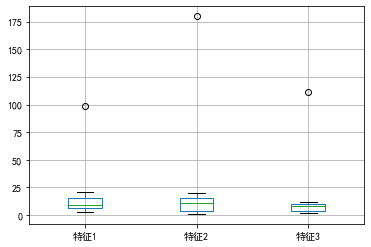

In [158]:
test_data03.boxplot()    #绘制箱形图，出现对中文命名的报错，可以不用管

### 3.2.2正态分布

In [169]:
for i in test_data03.columns:
    z = (test_data03[i] - test_data03[i].mean())/test_data03[i].std()
    test_data03[i] = abs(z) > 2

print(test_data03)

     特征1    特征2    特征3
0  False  False  False
1  False  False   True
2  False  False  False
3  False  False  False
4  False  False  False
5  False   True  False
6  False  False  False
7   True  False  False
8  False  False  False


## 3.3异常值处理

1.删除
<br>2.填充
<br>3.不处理

## （回PPT讲解课件）

# 4.非数值类型的处理

## 4.1Get_dummies哑变量处理    #简单&粗暴

#### 例1.性别处理

In [170]:
data_04 = pd.DataFrame({'NO':[1,2,3,4,5],'sex':['女','女','男','女','男']})  #创建含文字类型的数据集
data_04

,NO,sex
0,1,女
1,2,女
2,3,男
3,4,女
4,5,男


通过get_dummies()函数来对文本类型的数据进行处理
<br>第一个参数为要处理的表格名称，第二个参数为需要处理的列的名称

In [171]:
t1 = pd.get_dummies(data_04,columns = ['sex'])  #
t1

,NO,sex_女,sex_男
0,1,1,0
1,2,1,0
2,3,0,1
3,4,1,0
4,5,0,1


In [172]:
t1 = t1.drop(columns = 'sex_女')
t1 = t1.rename(columns = {'sex_男':'sex'})
t1

,NO,sex
0,1,0
1,2,0
2,3,1
3,4,0
4,5,1


#### 例2.买房问题中的"房屋朝向"处理

In [173]:
data_04 = pd.DataFrame({'房子ID': [1, 2, 3, 4, 5], '朝向': ['南', '西', '北', '东', '南']})
data_04

,房子ID,朝向
0,1,南
1,2,西
2,3,北
3,4,东
4,5,南


In [174]:
t2 = pd.get_dummies(data_04, columns=['朝向'])
t2

,房子ID,朝向_东,朝向_北,朝向_南,朝向_西
0,1,0,0,1,0
1,2,0,0,0,1
2,3,0,1,0,0
3,4,1,0,0,0
4,5,0,0,1,0


In [175]:
t2 = t2.drop(columns='朝向_西')
t2

,房子ID,朝向_东,朝向_北,朝向_南
0,1,0,0,1
1,2,0,0,0
2,3,0,1,0
3,4,1,0,0
4,5,0,0,1


#### 例3.库存T恤数据处理

In [176]:
import pandas as pd 
df = pd.DataFrame([  
            ['green', 'M', 10.1, 'label1'],   
            ['red', 'L', 13.5, 'label2'],   
            ['blue', 'XL', 15.3, 'label2']])  
# color、label不具备大小含义，size具有大小意义
df.columns = ['color', 'size', 'length', 'label']  
df

,color,size,length,label
0,green,M,10.1,label1
1,red,L,13.5,label2
2,blue,XL,15.3,label2


In [177]:
##如果不指定data列的话，默认是所有的分类变量进行处理
df_1=pd.get_dummies(df)
df_1

,length,color_blue,color_green,color_red,size_L,size_M,size_XL,label_label1,label_label2
0,10.1,0,1,0,0,1,0,1,0
1,13.5,0,0,1,1,0,0,0,1
2,15.3,1,0,0,0,0,1,0,1


In [178]:
#将指定列进行get_dummies 后合并到元数据中
df_3 = df.join(pd.get_dummies(df.color))
df_3

,color,size,length,label,blue,green,red
0,green,M,10.1,label1,0,1,0
1,red,L,13.5,label2,0,0,1
2,blue,XL,15.3,label2,1,0,0


## 4.2 Label Encoding编号处理

In [187]:
#创建数据集
data_LE = pd.DataFrame({'编号': [1, 2, 3, 4, 5], '城市': ['北京', '上海', '广州', '深圳', '北京']})
data_LE

,编号,城市
0,1,北京
1,2,上海
2,3,广州
3,4,深圳
4,5,北京


* 方法一、生成随机数

In [186]:
#step1.使用LabelEncoder将文本内容转换为数字,生成的数字是随机的
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(data_LE['城市'])
print(label)

[0 1 2 3 4]


In [182]:
#step2.将数据写入原数据集
data_LE['城市'] = label
data_LE

,编号,城市
0,1,1
1,2,0
2,3,2
3,4,3
4,5,1


* 方法二、指定数字替代

In [188]:
citymap = {'北京':1,'上海':2,'广州':3,'深圳':4}
data_LE['城市'] = data_LE['城市'].map(citymap)
data_LE

,编号,城市
0,1,1
1,2,2
2,3,3
3,4,4
4,5,1


## 4.3 补充：replace处理

In [189]:
#创建数据集
data_rp = pd.DataFrame({'编号': [1, 2, 3, 4, 5], '城市': ['北京', '上海', '广州', '深圳', '北京']})
data_rp

,编号,城市
0,1,北京
1,2,上海
2,3,广州
3,4,深圳
4,5,北京


In [190]:
data_rp['城市'].value_counts()

北京    2
上海    1
广州    1
深圳    1
Name: 城市, dtype: int64

In [191]:
data_rp['城市'] = data_rp['城市'].replace({'北京': 0, '上海': 1, '广州': 2, '深圳':3})
data_rp

,编号,城市
0,1,0
1,2,1
2,3,2
3,4,3
4,5,0


总结来说，Get_dummies的优点就是它的值只有0和1，缺点是当类别的数量很多时，特征维度会很高。所以如果Get_dummies类别数目不多时可以优先考虑，其次考虑Label Encoding或replace()函数。

## 4.4OneHotEncoder

In [192]:
from sklearn.preprocessing import  OneHotEncoder

enc = OneHotEncoder(sparse = False) 
ans = enc.fit_transform([[0, 0, 3],
                       [1, 1, 0],
                       [0, 2, 1],
                       [1, 0, 2]])
print(ans) 

[[1. 0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 1. 0.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


  下面解释输出结果的意思。对于输入数组，这依旧是把每一行当作一个样本，每一列当作一个特征，

* 第一个特征，即第一列 [0,1,0,1]，也就是说它有两个取值 0 或者 1，那么 one-hot 就会使用两位来表示这个特征，[1,0] 表示 0， [0,1] 表示 1，在上例输出结果中的前两位 [1,0...] 也就是表示该特征为 0
* 第二个特征，第二列 [0,1,2,0]，它有三种值，那么 one-hot 就会使用三位来表示这个特征，[1,0,0] 表示 0， [0,1,0] 表示 1，[0,0,1] 表示 2，在上例输出结果中的第三位到第六位 [...0,1,0,0...] 也就是表示该特征为 1
* 第三个特征，第三列 [3,0,1,2]，它有四种值，那么 one-hot 就会使用四位来表示这个特征，[1,0,0,0] 表示 0， [0,1,0,0] 表示 1，[0,0,1,0] 表示 2，[0,0,0,1] 表示 3，在上例输出结果中的最后四位 [...0,0,0,1] 也就是表示该特征为 3

 * 值得注意的是，虽然训练样本中的数值仅仅代表类别，但是也必须使用数值格式的数据，如果使用字符串格式的数据会报错。

## （回PPT讲解课件）

## 4.5案例-泰坦尼克号逃生问题数据处理

 注意

  pclass：社会经济地位代号（SES）

1st = 上
2nd = 中
3rd = 下
  age：如果年龄小于1，则年龄为分数。如果是估计年龄，格式为xx.5

  sibsp：数据集以这种方式定义了家庭关系

  Sibling =兄弟，姐妹，继兄弟，继姐妹

  Spouse =丈夫，妻子（情妇和未婚妻被忽略）

  parch：数据集以这种方式定义家庭关系

  Parent =母亲，父亲

  Child =女儿，儿子，继女，继子

  如果孩子仅由保姆带着出行，他们的parch = 0。


#### step1.数据准备与加载
* 1、导入所需包，并加载数据

In [193]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder

* 2、加载数据并显示：

In [194]:
train=pd.read_csv("D:\\学习\\python\\jupyter\\商分-机器学习课程相关代码\\dataset\\train.csv")
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [195]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### 方法一、label-encoding编码
* 优点
   解决了分类编码的问题，可以自由定义量化数字。但其实也是缺点，因为数值本身没有任何含义，只是排序。如大中小编码为123，也可以编码为321，即数值没有意义。
* 缺点
  可解释性比较差。比如有[dog,cat,dog,mouse,cat]，我们把其转换为[1,2,1,3,2]，这里就产生了一个奇怪的现象：dog和mouse的平均值是cat。因此，Label encoding编码其实并没有很宽的应用场景。

In [196]:
#先对sibsp和parch创建有序编码Family_Size_Category
#Family_Size_Category是值为‘single’,'small','large'的特征变量
def family_size_category(family_size):
  if family_size<=1:
      return 'single'
  elif family_size<=4:
      return 'small'
  else:
      return 'large'

train['family_size']=train['SibSp']+train['Parch']+1  #添加一个新的特征，由两个特征组合而成
train['Family_Size_Category']=train['family_size'].map(family_size_category) 
#根据新特征的人口数，用map函数，划分家庭类别：single、small、large

#对Family_Size_Category进行label encoding
le=LabelEncoder()
#对要的编码类别进行fit（可重复，会自动辨别）
le.fit(np.array(['single','small','large']))
train['Family_Size_Category']=le.transform(train['Family_Size_Category']) #对指定特征进行transform转换

print(le.classes_)#查看编码的所有标签类别
print(le.inverse_transform([2,1,0]))#查看数字对应的原标签类别, 输出结果为[2,1,0]对应的原特征值
train


['large' 'single' 'small']
['small' 'single' 'large']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,Family_Size_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,1


#### 方法二、get_dummies
* 优点： 
   * 1 本身就是 pandas 的模块，所以对 DataFrame 类型兼容很好. 
   * 2 无论你的列是字符型还是数字型都可以进行二值编码. 
   * 3 能根据用户指定，自动生成二值编码后的变量名. 
* 缺点：
   * 1 不是 sklearn 里的transformer类型，所以得到的结果得手动输入到 sklearn 里的相应模块
   * 2 无法像 sklearn 的transformer一样可以输入到pipeline中 进行流程化地机器学习过程

In [197]:
#仍以上述组合后并LabelEncoder的数据为例，对其再编码（实现扩维）
    
fam_size_cat_dummies_df = pd.get_dummies(train['Family_Size_Category'],
                                      prefix=train[['Family_Size_Category']].columns[0])
train = pd.concat([train, fam_size_cat_dummies_df], axis=1) #将编码后的特征加入原数据里面
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,Family_Size_Category,Family_Size_Category_0,Family_Size_Category_1,Family_Size_Category_2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,2,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,2,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,2,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,0,1,0


#### 方案三、one-hot encoding编码
* 优点
  解决了分类器不好处理分类数据的问题，在一定程度上也起到了扩充特征的作用。它的值只有0和1，不同的类型存储在垂直的空间。
* 缺点
  当类别的数量很多时，特征空间会变得非常大，容易造成维度灾难。
  

In [207]:
train=pd.read_csv("D:\\学习\\python\\jupyter\\商分-机器学习课程相关代码\\dataset\\train.csv")

train['family_size']=train['SibSp']+train['Parch']+1  #添加一个新的特征，由两个特征组合而成
train['Family_Size_Category']=train['family_size'].map(family_size_category) #根据新特征的人口数，用map函数，划分家庭类别：single、small、large

le=LabelEncoder()
#对要的编码类别进行fit（可重复，会自动辨别）
le.fit(np.array(['single','small','large']))
train['Family_Size_Category']=le.transform(train['Family_Size_Category']) #对指定特征进行transform转换



a1=OneHotEncoder(sparse=False).fit_transform(train[['Family_Size_Category']])
print('a1\n',a1)
a2=OneHotEncoder(sparse=False).fit_transform(train[['Pclass']])
print('\na2\n',a2)
final_output = np.hstack((a1,a2)) #将两个编好的特征组合起来
final_output


a1
 [[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]

a2
 [[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you us

array([[0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 1., 0., 0.],
       [0., 1., 0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 1.]])

## （回PPT讲解课件）

# 5.数据标准化

## 5.1min-max标准化

利用原始数据的最大最小值把原始数据转换到[0,1]区间内

In [208]:
#创建数据集
data_05 = pd.DataFrame({'房子面积': [78, 90, 54, 82, 101], '单价': [1, 2, 2, 3, 2]})
data_05

,房子面积,单价
0,78,1
1,90,2
2,54,2
3,82,3
4,101,2


In [209]:
from sklearn.preprocessing import MinMaxScaler   #sklearn库中有内置好的min-max处理的模块，直接调用即可
data_05_new = MinMaxScaler().fit_transform(data_05)
data_05_new

array([[0.5106383 , 0.        ],
       [0.76595745, 0.5       ],
       [0.        , 0.5       ],
       [0.59574468, 1.        ],
       [1.        , 0.5       ]])

其中第一列为房子面积归一化后的值，第二列为单价归一化后的值，可以看到它们都属于[0,1]范围内了

## 5.2 z-score標準化

也称均值归一化，通过原始数据的均值（mean）和标准差（standard deviation）对数据进行归一化。
<br>归一化后的数据符合标准正态分布：均值为0，标准差为1。

In [210]:
from sklearn.preprocessing import StandardScaler  #调用z-score相关的模块
data_05_z = StandardScaler().fit_transform(data_05)

data_05_z

array([[-0.19205532, -1.58113883],
       [ 0.57616596,  0.        ],
       [-1.72849788,  0.        ],
       [ 0.06401844,  1.58113883],
       [ 1.2803688 ,  0.        ]])

## 5.3案例-葡萄酒数据集归一化处理

* 1、导入所需包：

In [211]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

* 2、读取葡萄酒数据集，获取第二列"Alcohol",获取数据的基本情况,将数据进行归一化。

In [212]:
  data = pd.read_csv("D:\学习\python\jupyter\商分-机器学习课程相关代码\dataset\wine.csv")
  x =data[["Alcohol"]]          #获取第二列Alcohol   
  print(x.describe())           #获取数据的基本情况

          Alcohol
count  178.000000
mean    13.000618
std      0.811827
min     11.030000
25%     12.362500
50%     13.050000
75%     13.677500
max     14.830000


In [213]:
  minMax = MinMaxScaler()    
  x_std = minMax.fit_transform(x)    #将数据进行归一化
  print(x_std)

[[0.84210526]
 [0.57105263]
 [0.56052632]
 [0.87894737]
 [0.58157895]
 [0.83421053]
 [0.88421053]
 [0.79736842]
 [1.        ]
 [0.74473684]
 [0.80789474]
 [0.81315789]
 [0.71578947]
 [0.97894737]
 [0.88157895]
 [0.68421053]
 [0.86052632]
 [0.73684211]
 [0.83157895]
 [0.68684211]
 [0.79736842]
 [0.5       ]
 [0.70526316]
 [0.47894737]
 [0.65      ]
 [0.53157895]
 [0.62105263]
 [0.59736842]
 [0.74736842]
 [0.78684211]
 [0.71052632]
 [0.67105263]
 [0.69736842]
 [0.71842105]
 [0.65263158]
 [0.64473684]
 [0.59210526]
 [0.53157895]
 [0.53684211]
 [0.83947368]
 [0.66578947]
 [0.62631579]
 [0.75      ]
 [0.58157895]
 [0.53157895]
 [0.83684211]
 [0.88157895]
 [0.75526316]
 [0.80789474]
 [0.76578947]
 [0.53157895]
 [0.73684211]
 [0.73421053]
 [0.72105263]
 [0.71315789]
 [0.66578947]
 [0.83947368]
 [0.59473684]
 [0.70789474]
 [0.35263158]
 [0.34210526]
 [0.42368421]
 [0.69473684]
 [0.35263158]
 [0.3       ]
 [0.35263158]
 [0.54736842]
 [0.35263158]
 [0.60789474]
 [0.31052632]
 [0.33157895]
 [0.74

# 6.数据分箱

In [214]:
#创建数据集
data_06 = pd.DataFrame({'age': [66,19,54,82,24,20,35,38,45,22,41,25]})
data_06

,age
0,66
1,19
2,54
3,82
4,24
5,20
6,35
7,38
8,45
9,22


## 6.1等宽数据分箱

In [218]:
# 进行等宽数据分箱：
data_cut = pd.cut(data_06['age'],5)
print(data_cut)

0       (56.8, 69.4]
1     (18.937, 31.6]
2       (44.2, 56.8]
3       (69.4, 82.0]
4     (18.937, 31.6]
5     (18.937, 31.6]
6       (31.6, 44.2]
7       (31.6, 44.2]
8       (44.2, 56.8]
9     (18.937, 31.6]
10      (31.6, 44.2]
11    (18.937, 31.6]
Name: age, dtype: category
Categories (5, interval[float64]): [(18.937, 31.6] < (31.6, 44.2] < (44.2, 56.8] < (56.8, 69.4] < (69.4, 82.0]]


## 6.2group by分组

In [219]:
# 通过groupby()函数进行分组，count()函数计数
data_06['age'].groupby(data_cut).count()

age
(18.937, 31.6]    5
(31.6, 44.2]      3
(44.2, 56.8]      2
(56.8, 69.4]      1
(69.4, 82.0]      1
Name: age, dtype: int64

# 课后练习

## 练习1.通过均值填充表格中的空值
  创建数据集代码如下：
```
import numpy as np
import pandas as pd
data = pd.DataFrame([[1, np.nan, 3], [2, 2, np.nan], [1, np.nan, 0]], columns=['c1', 'c2', 'c3'])
data
```


In [ ]:
#请在此处编写代码创建数据集




In [ ]:
#请在此处编写代码对数据进行处理





## 练习2.对大一~大四年级的数据进行处理（使用LabelEncoder）
  创建数据集代码如下：
```
import pandas as pd
Class=['大一','大二','大三','大四']
df = pd.DataFrame({'Class':Class})
df
```


In [ ]:
#请在此处编写代码创建数据集




In [ ]:
#请在此处编写代码对数据进行处理





## 练习3.查看表格中的异常值
  创建数据集代码如下：
```
import pandas as pd
data = pd.DataFrame({'c1': [3, 10, 5, 7, 1, 59, 9],
                'c2': [15, 16, 14, 10, 119, 11, 8], 
                'c3': [20, 15, 118, 21, 12, 27, 29]},
                columns=['c1', 'c2', 'c3'])
data
```


In [ ]:
#请在此处编写代码创建数据集




In [ ]:
#请在此处编写代码对数据进行处理





## 练习4.将表中的数据进行min-max标准化
  创建数据集代码如下：
```
import pandas as pd
X = pd.DataFrame({'年龄': [50, 60, 40, 80, 90], '收入': [20000, 10000, 10000, 30000, 20000]})
X
```


In [ ]:
#请在此处编写代码创建数据集




In [ ]:
#请在此处编写代码对数据进行处理





# 同学们也可以自己创建一些数据集，多多练习吧！
   文档内如有错误，欢迎指出，谢谢~~